# Auto Insurance Fraud Detection


### Project Objective

Fraudulant claims are one of the biggest challenges facing any insurance provider. Hence, detecting fraud has not only considerable cost and profit potential for insurers, but also benifits the consumer as it will lead to lower premiums and faster processing of their insurance claims. 

In this projecr, I used a publicly available Automotive dataset to construct a maschine learning model to predict fraudulent insurance claims. 

After performing exploratory data analysis (in this notebook) to better understand the dataset, multiple ML models with hyperparameter tuning were compared and the best model was selected [see here](Insurance Fraud Detection-modeling.ipynb). At last, the issue of model explainability is addressed in a separate notebook. 


## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
import ipywidgets as widgets
from scipy import special

py.offline.init_notebook_mode(connected=True)   

### Lets first import the dataset
The dataset is available at https://raw.githubusercontent.com/jodb/sparkTestData/master/insurance_claims.csv

In [2]:
#load & view raw data
df = pd.read_csv('insurance_claims.csv')
df.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,2006-10-12,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,2000-06-04,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,1990-02-03,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,1997-02-05,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,2011-07-25,IL,100/300,500,1315.68,0,600983,...,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


#### Statistical descriptions of the columns

In [3]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [4]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [5]:
df.shape

(1000, 40)

In [6]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

Let's see the number of fraudulant and legitimate insurance claims

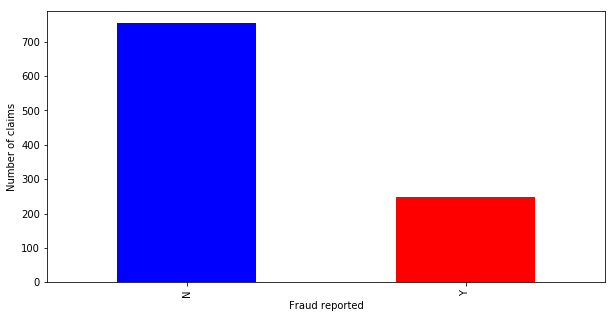

In [7]:
ax = pd.value_counts(df['fraud_reported']).plot.bar(color=['blue', 'red'], figsize=(10,5))
ax.set_xlabel('Fraud reported')
ax.set_ylabel('Number of claims')
plt.show()

In [8]:
df['fraud_reported'].value_counts() 

N    753
Y    247
Name: fraud_reported, dtype: int64

Here we have an imbalanced dataset. we have far more non-fraudulant cases than fraudulant ones.
We need to think about the class imbalance when using ML models 

In [9]:
# Which states did the incidents occur
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

In [10]:
fig = px.bar(df, x='incident_state', y='total_claim_amount', color='incident_state' )
fig.show()

Most of the incidents happend in New York, South Carolina, and West Virginia claiming > 10M $. Since our target is to identify fraudulant claims, let's see the percentage of fraudulant cases in some of the features. 

In [11]:
# breakdown of the incident states as a function of incident dates
fig = px.bar(df, x='incident_date', y='fraud_reported', color='incident_state' )
fig.show()

We see that we have two months of insurance claim data. 

In [12]:
# distribution of age 
fig = px.histogram(df, x='age', color='fraud_reported', histnorm='probability density')
fig.show()

Age doesnot seem to be a good indicator of fraud

In [13]:
# Total claim amount distribution
fig = px.histogram(df, x="total_claim_amount", color="fraud_reported", marginal="box", # can be 'rug', `box`, `violin`
                         hover_data=df.columns)
fig.show()

In [14]:
# distribution in Gender
labels = ['Male', 'Female']
fig = px.pie(df, values=df['insured_sex'].value_counts(), names=labels, title='% Gender')
fig.show()

In [15]:
# types of the incidents
fig = px.pie(df, values=df['incident_type'].value_counts(), names=df['incident_type'].value_counts().keys(), title='Incident Type', )
fig.show()

In [16]:
df[df.auto_make =='Saab'].fraud_reported.value_counts()

N    62
Y    18
Name: fraud_reported, dtype: int64

In [17]:
df[df.auto_make =='BMW'].fraud_reported.value_counts()

N    52
Y    20
Name: fraud_reported, dtype: int64

In [18]:
fig = px.histogram(df, x='auto_make',  color='fraud_reported')
fig.show()

In [19]:
fig = px.histogram(df, x='insured_education_level',  color='fraud_reported')
fig.show()

In [20]:
fig = px.histogram(df, x='insured_hobbies',  color='fraud_reported')
fig.show()

#### Very interesting that most of the claims by chess and cross-fit hobbyists are fraudulant 

In [21]:
fig = px.histogram(df, x='incident_severity',  color='fraud_reported')
fig.show()

Most fraudulant claims happen when a major damage happens. Therefore, incident severity looks like a good feature.

In [22]:
fig = px.pie(df, values=df['incident_severity'].value_counts(), names=df['incident_severity'].value_counts().keys(), title='Incident Severity')
fig.show()

In [23]:
fig = px.histogram(df, x='incident_type',  color='fraud_reported')
fig.show()

In [24]:
fig = px.histogram(df, x='insured_education_level',  color='fraud_reported', histnorm='probability density')
fig.show()

education level doesn't seem to be a strong indicator

In [25]:
fig = px.histogram(df, x='collision_type',  color='fraud_reported', histnorm='probability density')
fig.show()

Here we have a missing value. One way to handel this is to consider it as another type. Or we can uniformly distribute it to the other classes. 

In [26]:
fig = px.histogram(df, x='insured_occupation',  color='fraud_reported', histnorm='probability density')
fig.show()